In [1]:
from __future__ import absolute_import

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import misc

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


bird_small shape is  (128, 128, 3)
Iteration 0, Finding centroids for all samples...
Recompute centroids...
Iteration 1, Finding centroids for all samples...
Recompute centroids...
Iteration 2, Finding centroids for all samples...
Recompute centroids...
Iteration 3, Finding centroids for all samples...
Recompute centroids...
Iteration 4, Finding centroids for all samples...
Recompute centroids...
Iteration 5, Finding centroids for all samples...
Recompute centroids...
Iteration 6, Finding centroids for all samples...
Recompute centroids...
Iteration 7, Finding centroids for all samples...
Recompute centroids...
Iteration 8, Finding centroids for all samples...
Recompute centroids...
Iteration 9, Finding centroids for all samples...
Recompute centroids...


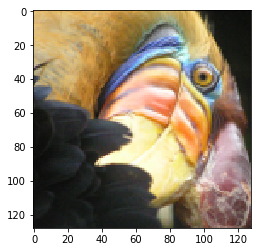

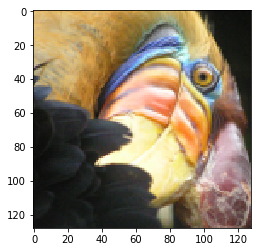

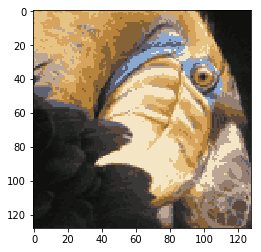

In [7]:
def get_centroids(samples, clusters):
    """
    Find the centroid given the samples and their cluster.

    :param samples: samples.
    :param clusters: list of clusters corresponding to each sample.
    :return: an array of centroids.
    """
    n_clusters = np.unique(clusters).shape[0]
    return np.array([samples[clusters==k].mean(axis=0) \
                     for k in range(n_clusters)])


def find_closest_centroids(samples, centroids):
    """
    Find the closest centroid for all samples.

    :param samples: samples.
    :param centroids: an array of centroids.
    :return: a list of cluster_id assignment.
    """
    dists = []
    for centroid in centroids:    
        dist = np.linalg.norm(samples - centroid, axis=1)
        dists.append(dist)
    dists = np.array(dists)
    labels = np.argmin(dists, axis=0)
    return labels


def run_k_means(samples, initial_centroids, n_iter):
    """
    Run K-means algorithm. The number of clusters 'K' is defined by the size of initial_centroids
    :param samples: samples.
    :param initial_centroids: a list of initial centroids.
    :param n_iter: number of iterations.
    :return: a pair of cluster assignment and history of centroids.
    """

    current_centroids = initial_centroids
    clusters = []
    for iteration in range(n_iter):
        print("Iteration %d, Finding centroids for all samples..." % iteration)
        clusters = find_closest_centroids(samples, current_centroids)
        print("Recompute centroids...")
        current_centroids = get_centroids(samples, clusters)

    return clusters, current_centroids


def choose_random_centroids(samples, K):
    """
    Randomly choose K centroids from samples.
    :param samples: samples.
    :param K: K as in K-means. Number of clusters.
    :return: an array of centroids.
    """
    centroids = samples.copy()
    np.random.shuffle(centroids)
    
    return centroids[:K]

def main():
    datafile = 'data/bird_small.png'
    # This creates a three-dimensional matrix bird_small whose first two indices
    # identify a pixel position and whose last index represents red, green, or blue.
    bird_small = scipy.misc.imread(datafile)

    print("bird_small shape is ", bird_small.shape)
    plt.imshow(bird_small)
    # Divide every entry in bird_small by 255 so all values are in the range of 0 to 1
    bird_small = bird_small / 255.

    # Unroll the image to shape (16384,3) (16384 is 128*128)
    bird_small = bird_small.reshape(-1, 3)

    # Run k-means on this data, forming 16 clusters, with random initialization
    clusters, current_centroids = run_k_means(bird_small, 
                                             choose_random_centroids(bird_small, K=16), 
                                             n_iter=10)

    
    # Now I have 16 centroids, each representing a color.
    # Let's assign an index to each pixel in the original image dictating
    # which of the 16 colors it should be
    def assign_centroid(data, current_centroids, cluster):
        return current_centroids[cluster]
    
    
    bird_small_copy = bird_small.copy()
    
    for i in range(clusters.shape[0]):
        bird_small_copy[i] = assign_centroid(bird_small_copy[i], 
                                             current_centroids, 
                                             clusters[i])

    # Now loop through the original image and form a new image
    # that only has 16 colors in it

#     final_image = np.zeros((clusters.shape[0], 3))

    # Reshape the original image and the new, final image and draw them
    # To see what the "compressed" image looks like
    plt.figure()
    plt.imshow(bird_small.reshape(128, 128, 3))
    plt.figure()
    plt.imshow(bird_small_copy.reshape(128, 128, 3))

    plt.show()


if __name__ == '__main__':
    main()